In [6]:
 pip install nltk

In [7]:
pip install newspaper3k

     |████████████████████████████████| 215kB 5.0MB/s 
     |████████████████████████████████| 92kB 5.1MB/s 
     |████████████████████████████████| 7.4MB 7.9MB/s 
     |████████████████████████████████| 81kB 2.1MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13538 sha256=f49ff36f1d034f980d0f3e7f63622280b8d8542c5ca31fe2a9c60ef8665c6172
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=e10e09ebe684c6ebb58e778b937de7d15167a7b3d953728e461bdf829ecf552e
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=0278503fb877210c1b7cfa7c55f9bb0045b18940c3741af8b7d86ceea1d20399
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da

In [8]:
#import libraries
from newspaper import Article
import random
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
nltk.download('punkt',quiet=True)

True

In [10]:
article = Article('https://agritech.tnau.ac.in/agricultural_marketing/agrimark_India.html')
article.download()
article.parse()
article.nlp()
agri = article.text

In [11]:
print(agri)

Agricultural Marketing in India

Agricultural Marketing in Tamilnadu Agricultural Marketing in India India is an agricultural country and one third population depends on the agricultural sector directly or indirectly. Agriculture remains as the main stray of the Indian economy since times immemorial. Indian agriculture contribution to the national gross domestic product (GDP) is about 25 per cent. With food being the crowning need of mankind, much emphasis has been on commercialising agricultural production. For this reason, adequate production and even distribution of food has of late become a high priority global concern. Agricultural marketing is mainly the buying and selling of agricultural products. In earlier days when the village economy was more or less self-sufficient the marketing of agricultural products presented no difficulty as the farmer sold his produce to the consumer on a cash or barter basis. Today's agricultural marketing has to undergo a series of exchanges or tran

In [12]:
#tokenization
text = agri
sentence_list = nltk.sent_tokenize(text) 


In [13]:
print(sentence_list)

['Agricultural Marketing in India\n\nAgricultural Marketing in Tamilnadu Agricultural Marketing in India India is an agricultural country and one third population depends on the agricultural sector directly or indirectly.', 'Agriculture remains as the main stray of the Indian economy since times immemorial.', 'Indian agriculture contribution to the national gross domestic product (GDP) is about 25 per cent.', 'With food being the crowning need of mankind, much emphasis has been on commercialising agricultural production.', 'For this reason, adequate production and even distribution of food has of late become a high priority global concern.', 'Agricultural marketing is mainly the buying and selling of agricultural products.', 'In earlier days when the village economy was more or less self-sufficient the marketing of agricultural products presented no difficulty as the farmer sold his produce to the consumer on a cash or barter basis.', "Today's agricultural marketing has to undergo a se

In [14]:
# function to return random greeting response
def greeting_response(text):
  text = text.lower()

  #bots greetinng response
  bot_greetings = ['hi','hello','hola','hey']
  #users greetings
  user_greetings= ['hi','hellooo','hello','greetings','wassup']

  for word in text.split():
    if word in user_greetings:
      return random.choice(bot_greetings)

In [15]:
def index_sort(list_var):
  length = len(list_var)
  list_index = list(range(0, length))

  x = list_var
  for i in range(length):
    for j in range(length):
      if x[list_index[i]] > x[list_index[j]]:
        #swap
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp

  return list_index

In [16]:
# create bot response
def bot_response(user_input):
  user_input = user_input.lower()
  sentence_list.append(user_input)
  bot_response = ''
  cm = CountVectorizer().fit_transform(sentence_list)
  similarity_scores = cosine_similarity(cm[-1],cm)
  similarity_scores_list = similarity_scores.flatten()
  index = index_sort(similarity_scores_list)
  index = index[1:]
  response_flag = 0

  j = 0
  for i in range(len(index)):
    if similarity_scores_list[index[i]] > 0.0:
      bot_response = bot_response +' ' +sentence_list[index[i]]
      response_flag = 1
      j = j+1
    if j >2:
      break

  if response_flag == 0:
    bot_response = bot_response+' '+"i don't understand"

  sentence_list.remove(user_input)

  return bot_response




In [17]:
#start chat
from IPython.display import Image
Image('/content/drive/MyDrive/farm.jpg')
print('Agri Bot: Iam Agri bot. i will answer your queries. if u want to exit please type bye')

exit_list = ['exit','bye','quit','break']

while(True):
  user_input = input()
  if user_input.lower() in exit_list:
    print("Agri bot: chat with you later!")
    break
  else:
    if greeting_response(user_input) != None :
      print("Agri bot: "+greeting_response(user_input))
    else:
      print("Agri bot :"+bot_response(user_input))



Agri Bot: Iam Agri bot. i will answer your queries. if u want to exit please type bye
hi
Agri bot: hola
bye
Agri bot: chat with you later!


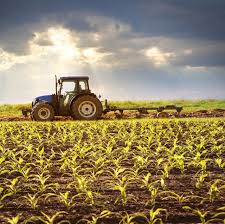

In [18]:
from IPython.display import Image
Image('/content/drive/MyDrive/farm.jpg')